## 라이브러리 로드

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [60]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [61]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


In [7]:
df.index.nunique()

541909

In [8]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
TotalPrice      6204
dtype: int64

In [9]:
df['TotalPrice'].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [43]:
# TotalPrice 데이터 추출
total_price = df['TotalPrice']

# 전체 데이터셋 평균과 표준 편차
df_mean = round(total_price.mean(),4)
df_std0 = round(np.std(total_price, ddof=0),4) # 자유도 n 사용
df_std1 = round(np.std(total_price, ddof=1),4) # 자유도 n-1 사용

print("전체 데이터셋 TotalPrice의 평균:", df_mean)
print("전체 데이터셋 TotalPrice의 표준편차(자유도 n):", df_std0)
print("전체 데이터셋 TotalPrice의 표준편차(자유도 n-1):", df_std1)

전체 데이터셋 TotalPrice의 평균: 17.9878
전체 데이터셋 TotalPrice의 표준편차(자유도 n): 378.8105
전체 데이터셋 TotalPrice의 표준편차(자유도 n-1): 378.8108


In [44]:
# TotalPrice 샘플 데이터 추출 1
sp_total_price = df['TotalPrice'].sample(1000)

# 샘플 데이터셋 평균과 표준 편차
sample_mean = round(sp_total_price.mean(), 4)
sample_std0 = round(np.std(sp_total_price, ddof=0), 4) # 자유도 n 사용
sample_std1 = round(np.std(sp_total_price, ddof=1), 4) # 자유도 n-1 사용

print("샘플 데이터셋 TotalPrice의 평균:", sample_mean)
print("샘플 데이터셋 TotalPrice의 표준편차(자유도 n):", sample_std0)
print("샘플 데이터셋 TotalPrice의 표준편차(자유도 n-1):", sample_std1)

샘플 데이터셋 TotalPrice의 평균: 19.6671
샘플 데이터셋 TotalPrice의 표준편차(자유도 n): 56.3831
샘플 데이터셋 TotalPrice의 표준편차(자유도 n-1): 56.4113


In [45]:
# TotalPrice 샘플 데이터 추출 2
sp_total_price = df['TotalPrice'].sample(1000)

# 샘플 데이터셋 평균과 표준 편차
sample_mean = round(sp_total_price.mean(), 4)
sample_std0 = round(np.std(sp_total_price, ddof=0), 4) # 자유도 n 사용
sample_std1 = round(np.std(sp_total_price, ddof=1), 4) # 자유도 n-1 사용

print("샘플 데이터셋 TotalPrice의 평균:", sample_mean)
print("샘플 데이터셋 TotalPrice의 표준편차(자유도 n):", sample_std0)
print("샘플 데이터셋 TotalPrice의 표준편차(자유도 n-1):", sample_std1)

샘플 데이터셋 TotalPrice의 평균: 16.596
샘플 데이터셋 TotalPrice의 표준편차(자유도 n): 34.9784
샘플 데이터셋 TotalPrice의 표준편차(자유도 n-1): 34.9959


In [46]:
# TotalPrice 샘플 데이터 추출 3
sp_total_price = df['TotalPrice'].sample(1000)

# 샘플 데이터셋 평균과 표준 편차
sample_mean = round(sp_total_price.mean(), 4)
sample_std0 = round(np.std(sp_total_price, ddof=0), 4) # 자유도 n 사용
sample_std1 = round(np.std(sp_total_price, ddof=1), 4) # 자유도 n-1 사용

print("샘플 데이터셋 TotalPrice의 평균:", sample_mean)
print("샘플 데이터셋 TotalPrice의 표준편차(자유도 n):", sample_std0)
print("샘플 데이터셋 TotalPrice의 표준편차(자유도 n-1):", sample_std1)

샘플 데이터셋 TotalPrice의 평균: 21.4956
샘플 데이터셋 TotalPrice의 표준편차(자유도 n): 104.339
샘플 데이터셋 TotalPrice의 표준편차(자유도 n-1): 104.3912


### 'TotalPrice' 평균과 표준편차 비교
모집단의 평균은 17.9878, 표준편차는 378.8105(자유도 = n), 378.8108(자유도 = n-1) 이다.   
표본은 세 번 추출했고 표본의 각 평균은 17.9878 내외였고,    
표본의 각 표준편차는 모집단 표준편차와 완전히 달랐다.

In [50]:
# 중심극한정리
# 여러번에 걸쳐서 표본 평균을 계산합니다

sample_means = []
n_samples = 5000 # 표본 추출 횟수
sample_size = 1000 # 각 표본의 크기

for _ in range(n_samples):
  sample = df['TotalPrice'].sample(n=sample_size)
  sample_means.append(sample.mean())

<function matplotlib.pyplot.show(close=None, block=None)>

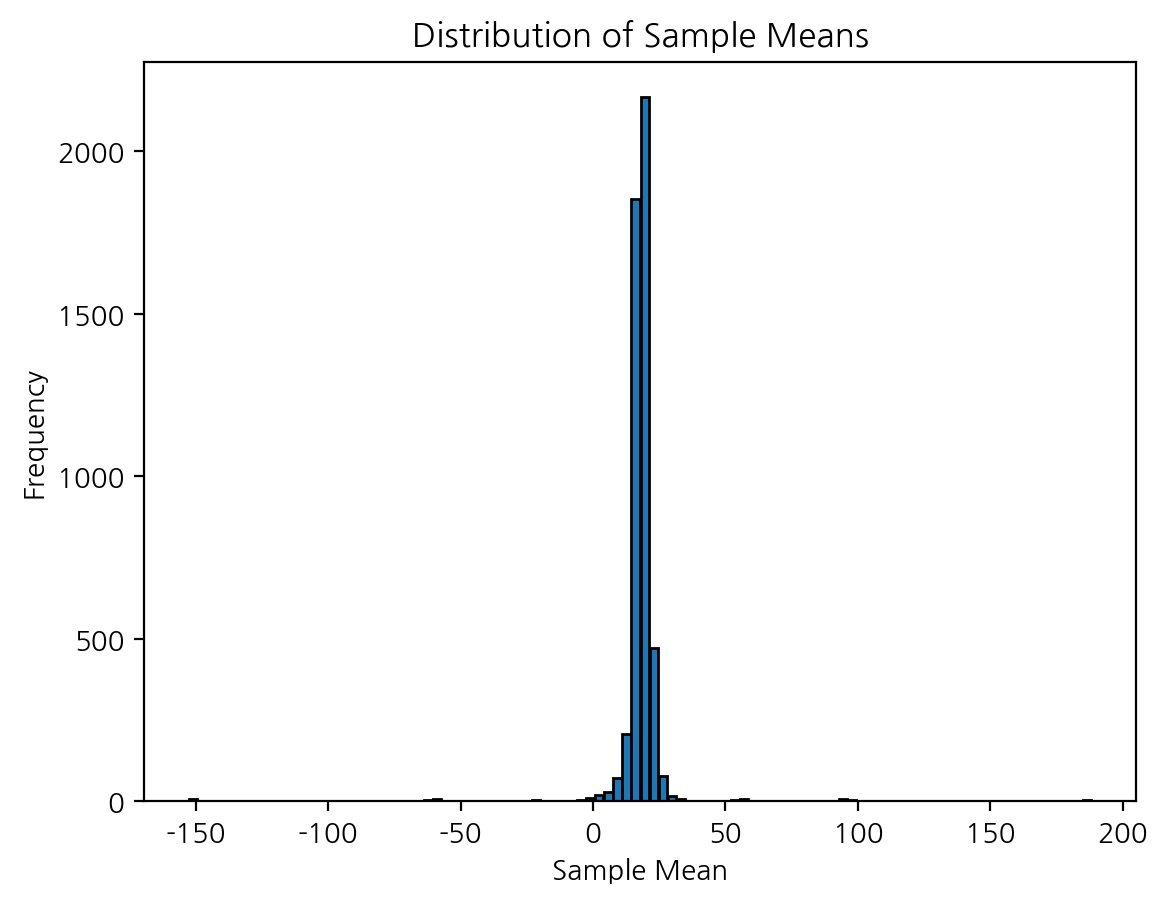

In [54]:
# 표본 평균들의 분포를 시각화합니다.

plt.hist(sample_means, bins=100, edgecolor='black', rwidth=0.9)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show

### 중심 극한 정리
동일한 확률 분포를 가진 독립 확률 변수 n개의 평균 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리   
그래서 무작위로 1000개의 표본을 추출하는 것을 1000번 해서 (부트스트래핑) 각 평균을 구하고 평균들의 frequency를 histogram으로 시각화했다   
bins를 작게 해서 표시했더니 모집단의 평균 즈음에서 높이 솟는 정규분포의 모양과 비슷했다

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [62]:
from scipy import stats

# 데이터 로드
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# 'TotalPrice'와 'Country' 컬럼을 찾기
df.loc[:,['TotalPrice', 'Country']]

,TotalPrice,Country
0,15.30,United Kingdom
1,20.34,United Kingdom
2,22.00,United Kingdom
3,20.34,United Kingdom
4,20.34,United Kingdom
...,...,...
541904,10.20,France
541905,12.60,France
541906,16.60,France
541907,16.60,France


In [69]:
# 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾기
df.groupby(['Country'])['TotalPrice'].count().sort_values(ascending=False).head(2)

Country
United Kingdom    495478
Germany             9495
Name: TotalPrice, dtype: int64

In [76]:
# 통계적 검증 수행하기 -  United Kingdom과 Germany 분석
# 각 국가의 'TotalPrice' 평균 계산
UK_TotalPrice = df[df['Country']== 'United Kingdom']['TotalPrice']
DE_TotalPrice = df[df['Country']== 'Germany']['TotalPrice']

UK_mean = UK_TotalPrice.mean()
DE_mean = DE_TotalPrice.mean()
print("United Kingdom's Total Price Mean:", UK_mean)
print("Germany's Total Price Mean:", DE_mean)

United Kingdom's Total Price Mean: 16.525065419655366
Germany's Total Price Mean: 23.348942601369142


In [79]:
# 독립 표본 t-검정

t_static, p_value = stats.ttest_ind(UK_TotalPrice, DE_TotalPrice, equal_var=False)

print("t_static:", round(t_static, 4))
print("p_value", round(p_value, 4))

t_static: -10.0464
p_value 0.0


### 두 국가 간 'TotalPrice'의 평균 차이가 통계적으로 유의미한지 검증

α=0.05 로 설정하기로 한다. 이는 귀무가설이 참일 때, 잘못하여 귀무가설을 기각하는 오류를 범할 최대 허용 확률이다.   
p_value가 0.05 이하이므로 귀무가설을 기각하고 대립가설을 채택하고, 두 표본 그룹 간 평균 차이가 통계적으로 유의미함을 입증한다.

1종 오류는 귀무가설이 실제로 참인데 잘못하여 기각하는 오류이고 2종 오류는 귀무가설이 거짓인데 이를 채택하는 오류이다

해당 데이터셋은 대립가설을 채택해야 하는 상황인데 만약 귀무가설을 선택하게 되면 2종 오류를 범하는 것이다

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [80]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

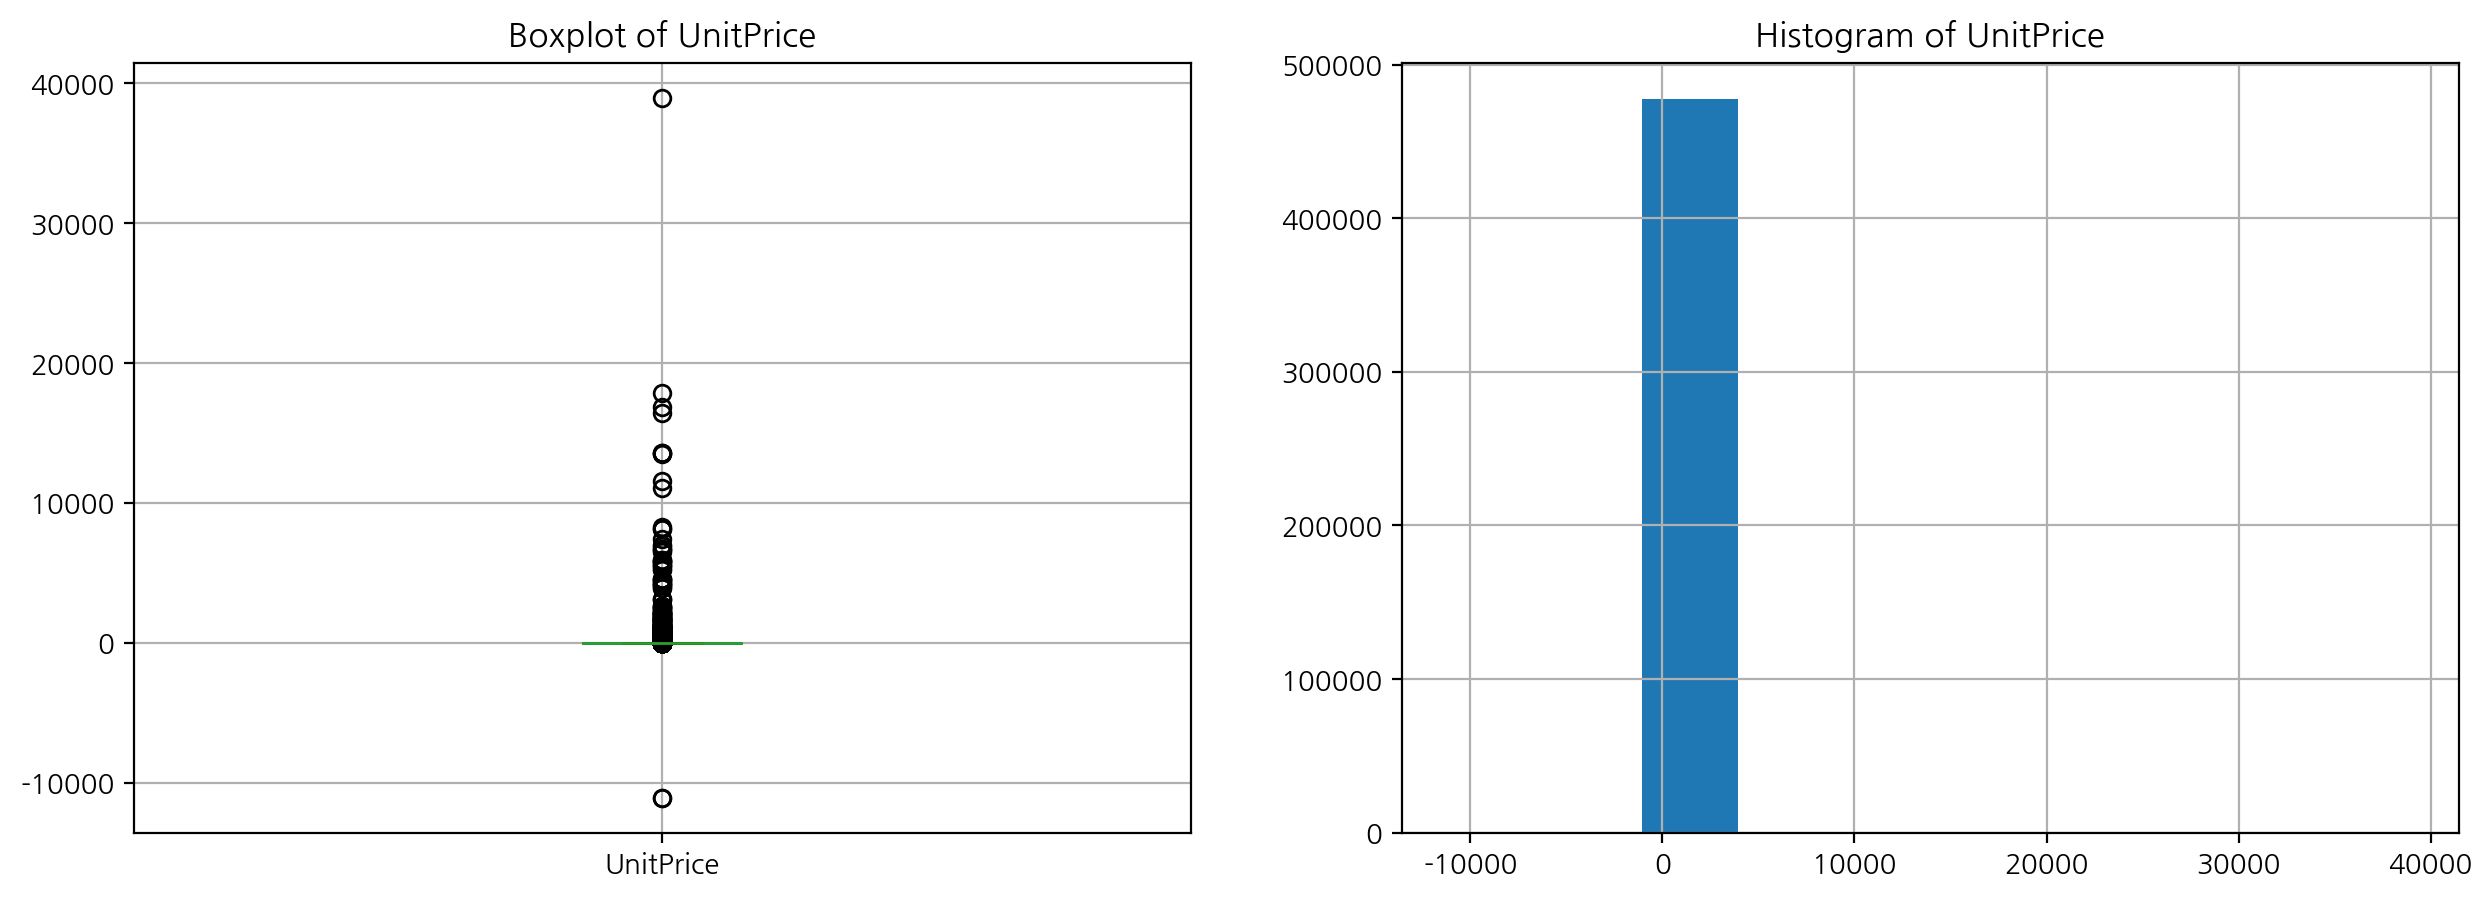

In [107]:
# 주중 'UnitPrice' plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot
weekday_data.boxplot('UnitPrice', ax=ax[0])
ax[0].set_title('Boxplot of UnitPrice')

# Histogram
weekday_data['UnitPrice'].hist(ax=ax[1])
ax[1].set_title('Histogram of UnitPrice')

plt.show()

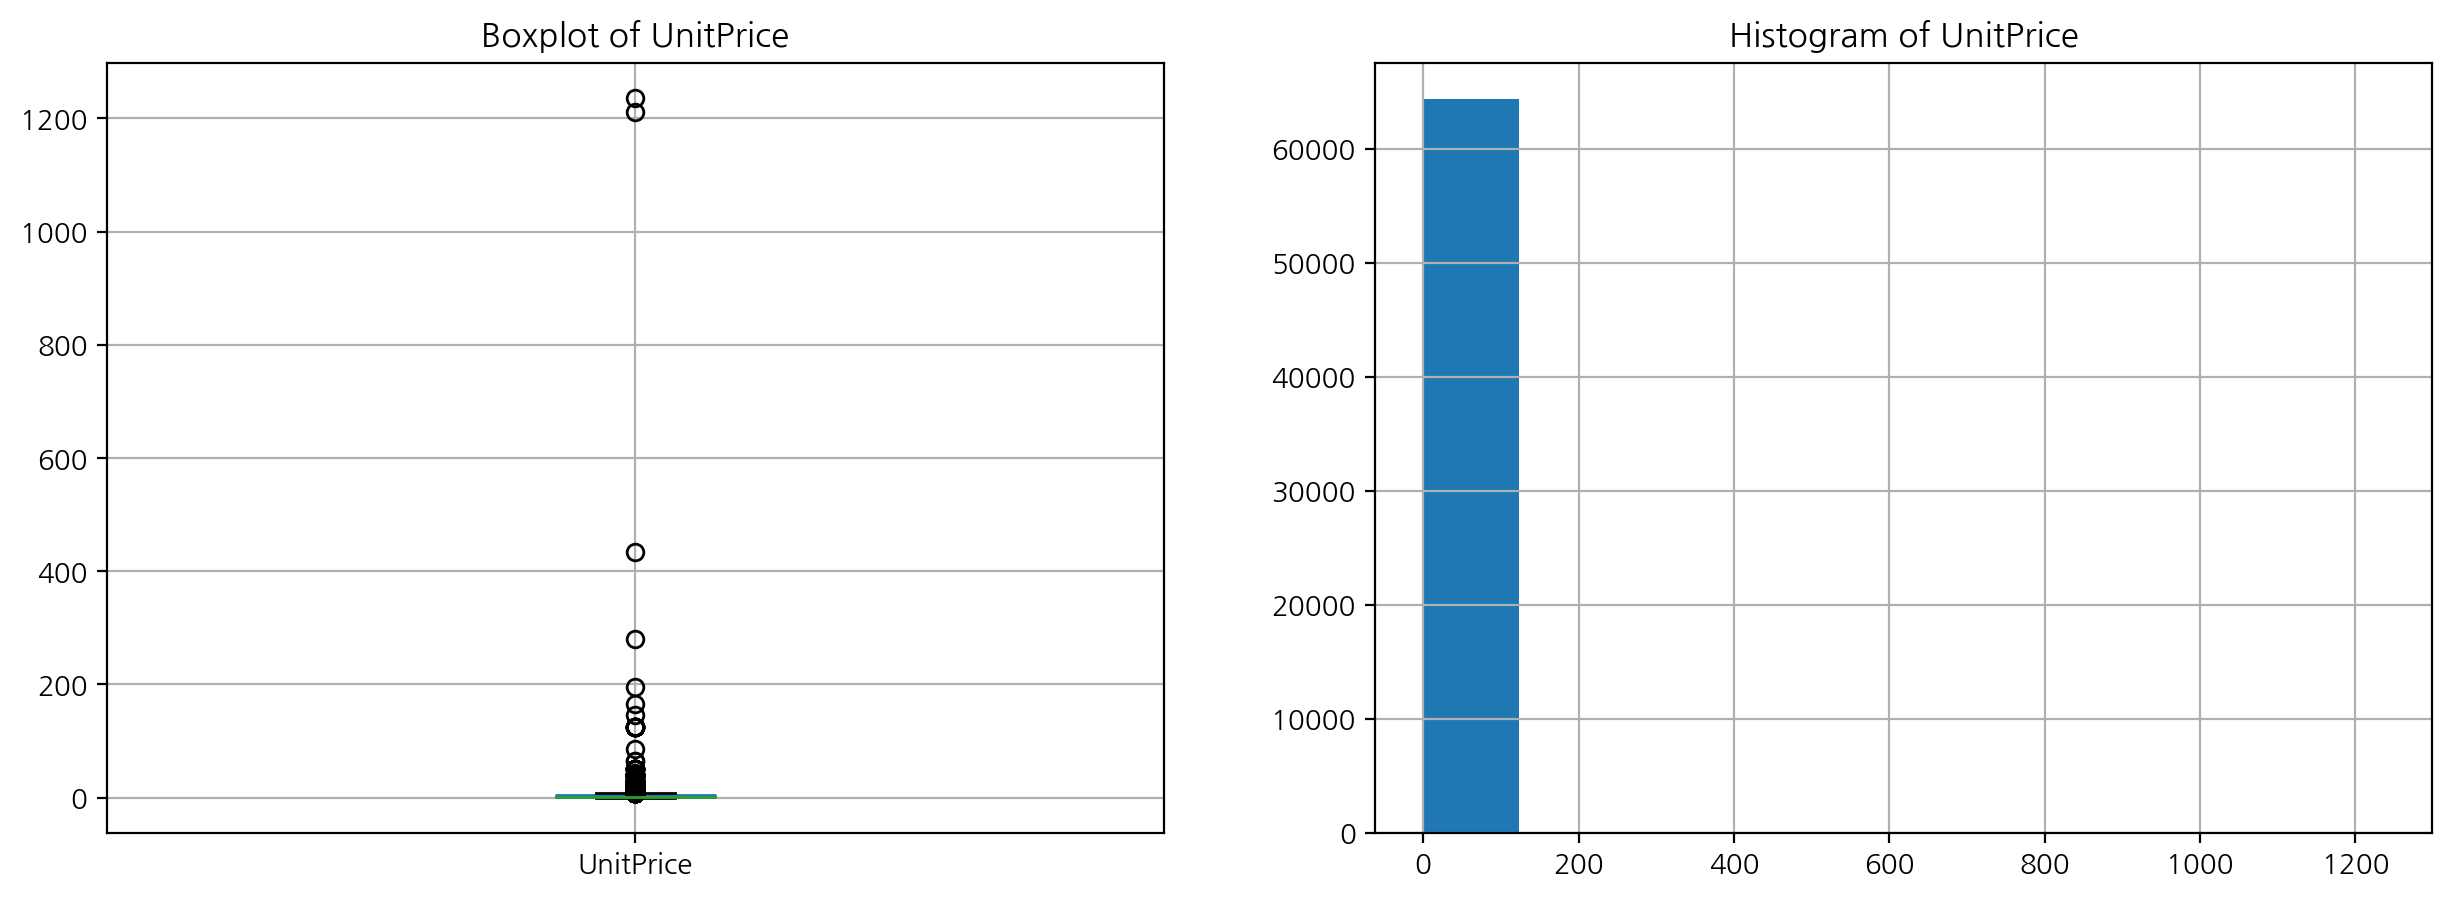

In [108]:
# 주중 'UnitPrice' plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot
weekend_data.boxplot('UnitPrice', ax=ax[0])
ax[0].set_title('Boxplot of UnitPrice')

# Histogram
weekend_data['UnitPrice'].hist(ax=ax[1])
ax[1].set_title('Histogram of UnitPrice')

plt.show()

In [113]:
# 데이터의 분위수
weekday_quan = weekday_data['UnitPrice'].quantile([0.25, 0.5, 0.75])
weekend_quan = weekend_data['UnitPrice'].quantile([0.25, 0.5, 0.75])
print('주중 분위:', weekday_quan)
print('주말 분위:', weekend_quan)

주중 분위: 0.25    1.25
0.50    2.10
0.75    4.13
Name: UnitPrice, dtype: float64
주말 분위: 0.25    1.25
0.50    1.85
0.75    3.75
Name: UnitPrice, dtype: float64


In [116]:
# 중심경향치(평균, 중간값),
weekday_mean = weekday_data['UnitPrice'].mean()
weekday_median = weekday_data['UnitPrice'].median()
weekend_mean = weekend_data['UnitPrice'].mean()
weekend_median = weekend_data['UnitPrice'].median()

print('주중 평균:', weekday_mean, '주중 중간값:',weekday_median)
print('주말 평균:', weekend_mean, '주말 중간값:',weekend_median)

# 변산성(표준편차, 분산)
weekday_std = np.std(weekday_data['UnitPrice'], ddof=1)
weekday_var = np.var(weekday_data['UnitPrice'], ddof=1)
weekend_std = np.std(weekend_data['UnitPrice'], ddof=1)
weekend_var = np.var(weekend_data['UnitPrice'], ddof=1)

print('주중 표준편차:', weekday_std, '주중 분산:',weekday_var)
print('주말 표준편차:', weekend_std, '주말 분산:',weekend_var)

주중 평균: 4.843425333065292 주중 중간값: 2.1
주말 평균: 2.8878244815533978 주말 중간값: 1.85
주중 표준편차: 103.03205776163102 주중 분산: 10615.604926596072
주말 표준편차: 7.959497387498765 주말 분산: 63.35359866159967


## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [117]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Mann-Whitney U-검정 수행
# TotalPrice 데이터 추출
total_price = df['TotalPrice']

In [ ]:
# Mann-Whitney U-검정 수행
u_statistic, p_value = stats.mannwhitneyu(monthly_charges_churn_yes, monthly_charges_churn_no)
u_statistic, p_value

## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [118]:
# UnitPrice 데이터 추출
unit_price = df['UnitPrice']

# 점추정: 월별 지출의 표본 평균 계산
point_estimate = unit_price.mean()
print(point_estimate)

# 구간 추정: 95% 신뢰구간 계산
# 표본 크기, 표본 평균, 표본 표준편차 계산
sample_size = len(unit_price)
sample_mean = unit_price.mean()
# 표본 표준편차 (자유도 n-1 사용)
sample_std = np.std(unit_price, ddof=1)
sample_std

4.611113626088513


96.75985306117938

In [119]:
# 표준편차 직접 구하기
var = ((unit_price - unit_price.mean())**2).sum() / (len(unit_price) - 1)
# std = var ** 0.5
std = np.sqrt(var)
std

96.75985306117938

In [120]:
from scipy import stats

# 신뢰구간 계산 (t-분포 사용)
# stats.t.ppf 로 t_critical 구하기
confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1)  # t-분포의 임계값
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

point_estimate, confidence_interval

(4.611113626088513, (4.353492734282087, 4.868734517894939))

<Axes: xlabel='UnitPrice'>

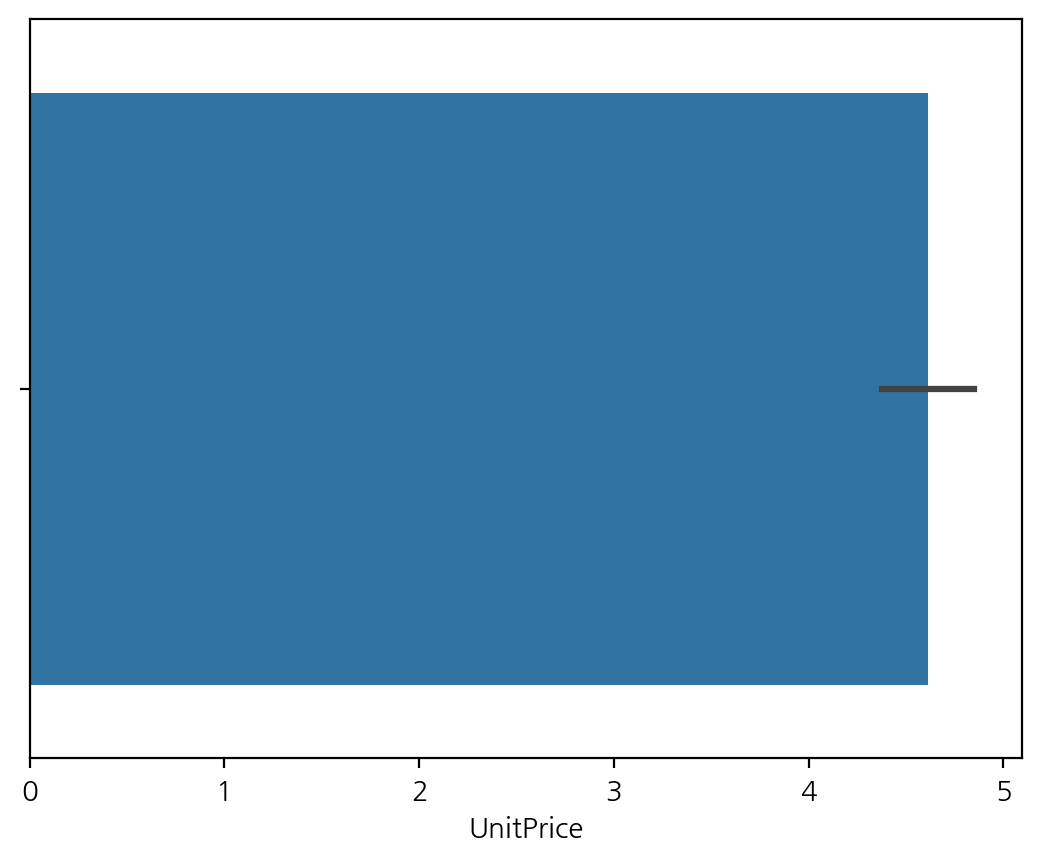

In [121]:
sns.barplot(data=df, x="UnitPrice")

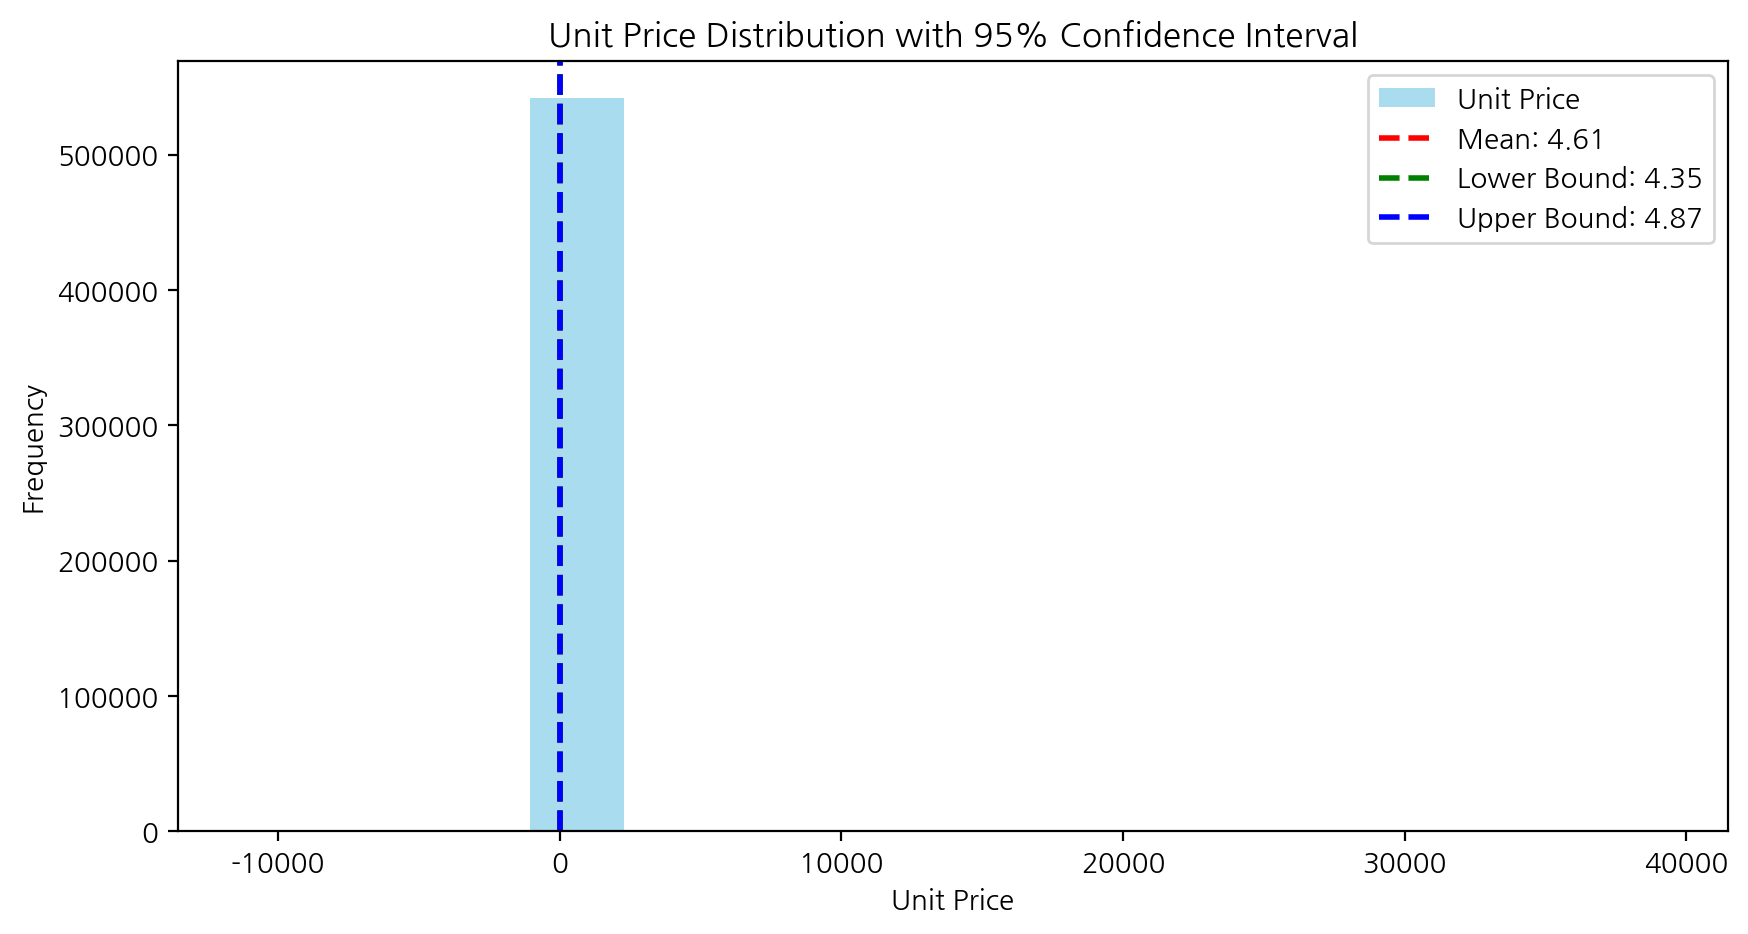

In [122]:
# 점추정 및 신뢰구간 시각화
plt.figure(figsize=(10, 5))
plt.hist(unit_price, bins=15, color='skyblue', alpha=0.7, label='Unit Price')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2, label=f'Upper Bound: {confidence_interval[1]:.2f}')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Unit Price Distribution with 95% Confidence Interval')
plt.legend()
plt.show()

총 세 번의 수업 중 두 번의 수업을 빠지다 보니 단어 하나하나가 이해가 어렵다
비지니스적으로 어떻게 분석하는지도 모르겠고...
결과를 보고도 맞는지 판단이 되지 않는다
주말에 다시 공부하고 실습도 다시 해봐야겠다